In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from src.photometric_stereo import build_light_dirs, build_light_dirs_tilted, build_light_dirs_point, Config

angles = [64, 113, 162, 211, 259, 308] # FLI Degrees starting from x=0, y=-r going clockwise
angles = [(270 - a) % 360 for a in angles]  # Convert to standard math degrees starting from x=+r, y=0 going counter-clockwise

r = 16.5  # mm, radius of LED ring

d = 56 # mm, distance from target plane to MCC pinhole

In [2]:
def build_light_dirs_william(angles_deg, r, d):
    A = 25.5  # mm, distance from center to LED ring plane
    theta_deg = 18  # MCC tilt angle
    theta = np.deg2rad(theta_deg)

    # Convert angles to radians
    angles = np.deg2rad(angles_deg)

    # Build un-tilted LED positions
    L = np.array([
        [r * np.cos(a),
         r * np.sin(a),
         -A] for a in angles
    ])

    # Rotation matrix around X axis
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta),  np.cos(theta)]
    ])

    # Apply rotation
    L = (Rx @ L.T).T

    # Shift LEDs to be relative to MCC pinhole at (0,0,0)
    L += np.array([0, 0, d])

    # Normalize to unit vectors
    L /= np.linalg.norm(L, axis=1, keepdims=True)

    return L

L = build_light_dirs_william(angles, r, d)
print(L)

[[-0.44879062  0.03028707  0.89312355]
 [-0.38387984  0.35413473  0.8527748 ]
 [-0.1174262   0.52518932  0.84284475]
 [ 0.19855768  0.49839546  0.84390569]
 [ 0.42516735  0.28544756  0.85892515]
 [ 0.41309013 -0.05659317  0.90893001]]


In [3]:
def plot_leds(L, scale):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(L[:,0], L[:,1], L[:,2])
    ax.scatter(L[:,0], L[:,1], L[:,2], color='r')

    # draw axes
    ax.quiver(0,0,0, scale,0,0, color='r')   # X
    ax.quiver(0,0,0, 0,scale,0, color='g')   # Y
    ax.quiver(0,0,0, 0,0,scale, color='b')   # Z

    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.set_zlabel('Z (mm)')
    ax.set_box_aspect([1,1,1])
    plt.show()

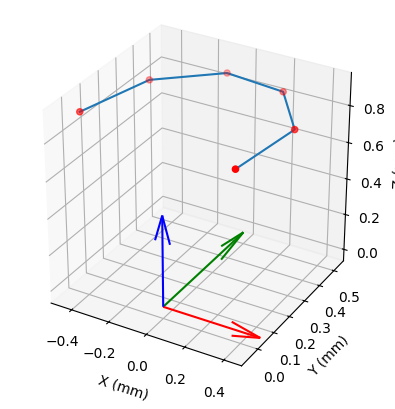

In [11]:
plot_leds(L, 0.5)

In [5]:

print("=== build_light_dirs ===")
L_simple = build_light_dirs(angles_deg=angles, z_tilt=Config.Z_TILT)
print(L_simple)
print("Shape:", L_simple.shape, "\n")

print("=== build_light_dirs_tilted ===")
L_tilted = build_light_dirs_tilted(angles_deg=angles, z_tilt=1.5, cam_tilt_deg=(18.0, 0.0, 0.0))
print(L_tilted)
print("Shape:", L_tilted.shape, "\n")

print("=== build_light_dirs_point ===")
L_point = build_light_dirs_point(
    angles_deg=angles,
    r=0.02,
    h=0.02,
    cam_tilt_deg=(18.0, 0.0, 0.0),
    cam_offset_rig=(0.0, 0.0, 0.0),
    z_ref=0.30
)
print(L_point)
print("Shape:", L_point.shape, "\n")

=== build_light_dirs ===
[[-0.40195292 -0.19604553  0.8944272 ]
 [-0.41166228  0.17474027  0.8944272 ]
 [-0.1381966   0.4253254   0.8944272 ]
 [ 0.23033203  0.38333687  0.8944272 ]
 [ 0.438997    0.08533238  0.8944272 ]
 [ 0.35240912 -0.27533218  0.8944272 ]]
Shape: (6, 3) 

=== build_light_dirs_tilted ===
[[-0.49856123 -0.48838094  0.7161849 ]
 [-0.51060426 -0.050987    0.85830283]
 [-0.1714118   0.24461333  0.9543492 ]
 [ 0.2856917   0.19508196  0.9382555 ]
 [ 0.5445088  -0.15645617  0.8240338 ]
 [ 0.43710974 -0.58191067  0.68579525]]
Shape: (6, 3) 

=== build_light_dirs_point ===
[[-0.06315579 -0.0510093  -0.9966992 ]
 [-0.06594476  0.00448396 -0.99781317]
 [-0.02243903  0.04324117 -0.9988127 ]
 [ 0.03731357  0.03667309 -0.99863046]
 [ 0.06999146 -0.00909429 -0.99750614]
 [ 0.05514803 -0.06260377 -0.99651366]]
Shape: (6, 3) 



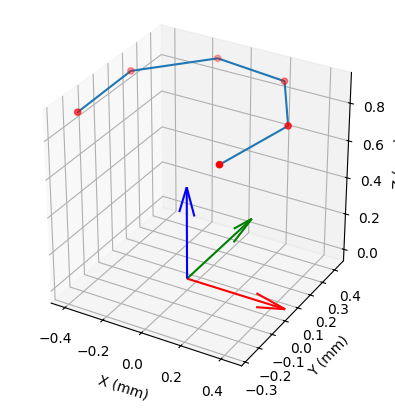

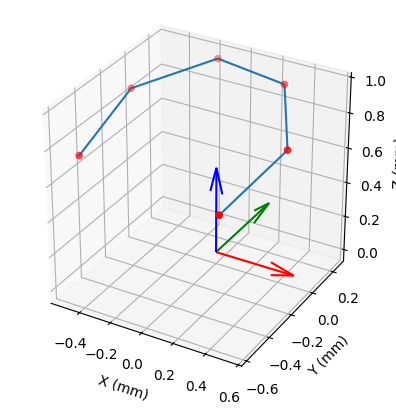

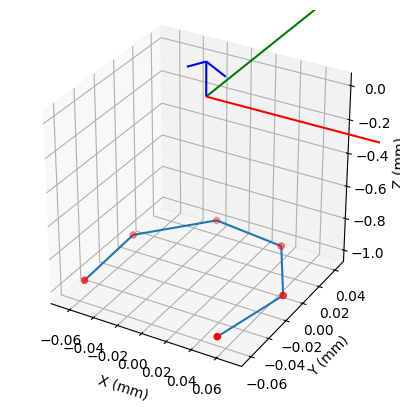

In [6]:
plot_leds(L_simple, 0.5)
plot_leds(L_tilted, 0.5)
plot_leds(L_point, 0.2)